In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv('iris.csv')

In [5]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [9]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [13]:
data=data.rename(
    columns={
        'sepal.length':'sl',
        'sepal.width':'sw',
        'petal.length':'pl',
        'petal.width':'pw'
    }
    
)

In [15]:
data[data['variety']=='Setosa']['sl'].describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sl, dtype: float64

In [17]:
df=pd.read_csv('nba.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [21]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [23]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df['College']=df['College'].ffill()


In [25]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [29]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Georgia State,5.000000e+06


In [33]:
age_salary=df[['Age','Salary']]
age_salary.head()

,Age,Salary
0,25.0,7.730337e+06
1,25.0,6.796117e+06
2,27.0,4.842684e+06
3,22.0,1.148640e+06
4,29.0,5.000000e+06


In [43]:
bins=[19,25,31,36,40]
labels=['19-24','25-30','30-25','36-40']
age_salary['Age_Group']=pd.cut(age_salary['Age'],bins=bins,labels=labels,right=False)
age_salary.head()

C:\Users\abhin\AppData\Local\Temp\ipykernel_60496\3132873588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_salary['Age_Group']=pd.cut(age_salary['Age'],bins=bins,labels=labels,right=False)


,Age,Salary,Age_Group
0,25.0,7.730337e+06,25-30
1,25.0,6.796117e+06,25-30
2,27.0,4.842684e+06,25-30
3,22.0,1.148640e+06,19-24
4,29.0,5.000000e+06,25-30


In [45]:
age_salary.tail()

,Age,Salary,Age_Group
452,20.0,2239800.0,19-24
453,26.0,2433333.0,25-30
454,24.0,900000.0,19-24
455,26.0,2900000.0,25-30
456,26.0,947276.0,25-30


<Axes: xlabel='Age_Group', ylabel='Salary'>

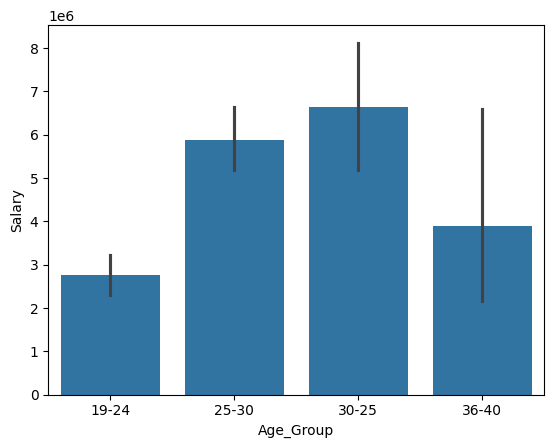

In [57]:
sns.barplot(data=age_salary,x='Age_Group',y='Salary')

In [63]:
grouped=age_salary.groupby('Age_Group')

C:\Users\abhin\AppData\Local\Temp\ipykernel_60496\40998872.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=age_salary.groupby('Age_Group')


In [65]:
grouped.head()

,Age,Salary,Age_Group
0,25.0,7.730337e+06,25-30
1,25.0,6.796117e+06,25-30
2,27.0,4.842684e+06,25-30
3,22.0,1.148640e+06,19-24
4,29.0,5.000000e+06,25-30
5,29.0,1.200000e+07,25-30
6,21.0,1.170960e+06,19-24
8,22.0,1.824360e+06,19-24
9,22.0,3.431040e+06,19-24
10,24.0,2.569260e+06,19-24


In [67]:
grouped['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1.721380e+06,3.150510e+06,16407501.0
25-30,212.0,5.870999e+06,5.471951e+06,55722.0,1100602.00,4.025000e+06,8.991574e+06,22359364.0
30-25,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
36-40,20.0,3.897656e+06,5.373672e+06,222888.0,947276.00,2.834470e+06,4.276685e+06,25000000.0
